# Part 1: Skip Gram


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [ ]:
!pip install gensim
import os
import string
import pandas as pd
import numpy as np
import re
import pprint
from urllib.request import urlopen

import gensim
from gensim import corpora, models, similarities
import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
--2019-11-12 23:21:11--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.236.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.236.101|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



**Q1 (1 point)** : Find the cosine similarity between the following word pairs

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
#Replace 0 with the code / value; Do not delete this cell
similarity_pair1 = model.similarity('France', 'England')
similarity_pair2 = model.similarity('smaller', 'bigger')
similarity_pair3 = model.similarity('England', 'London')
similarity_pair4 = model.similarity('France', 'Rocket')
similarity_pair5 = model.similarity('big', 'bigger')



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
#This is an autograded cell, do not edit/delete
print(similarity_pair1, similarity_pair2, similarity_pair3, similarity_pair4, similarity_pair5)

0.39804944 0.7302272 0.43992856 0.07114174 0.68423855


**Q2 (1 point)** : Write an expression to extract the vector representations of the words: 

- France
- England
- smaller
- bigger
- rocket
- big

Get only the first 5 elements for each vector representation.

In [ ]:
#Replace 0 with the code / value to get the first 5 elements of each vector; Do not delete this cell
vector_1 = model['France'][:5]
vector_2 = model['England'][:5]
vector_3 = model['smaller'][:5]
vector_4 = model['bigger'][:5]
vector_5 = model['rocket'][:5]
vector_6 = model['big'][:5]



In [ ]:
#This is an autograded cell, do not edit/delete
print(vector_1)
print(vector_2)
print(vector_3)
print(vector_4)
print(vector_5)
print(vector_6)


[0.04858398 0.07861328 0.32421875 0.03491211 0.07714844]
[-0.19824219  0.11523438  0.0625     -0.05834961  0.2265625 ]
[-0.05004883  0.03417969 -0.0703125   0.17578125  0.00689697]
[-0.06542969 -0.09521484 -0.06225586  0.16210938  0.01989746]
[-0.03198242  0.27148438 -0.2890625  -0.15429688  0.16894531]
[ 0.11132812  0.10595703 -0.07373047  0.18847656  0.07666016]


**Q3 (1 point)**: Find the euclidean distances between the word pairs : 

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)


In [ ]:
#Replace 0 with the code / value; Do not delete this cell
eu_dist1 = np.linalg.norm(model['France']-model['England'])
eu_dist2 = np.linalg.norm(model['smaller']-model['bigger'])
eu_dist3 = np.linalg.norm(model['England']-model['London'])
eu_dist4 = np.linalg.norm(model['France']-model['Rocket'])
eu_dist5 = np.linalg.norm(model['big']-model['bigger'])



In [ ]:
#This is an autograded cell, do not edit / delete
print(eu_dist1)
print(eu_dist2)
print(eu_dist3)
print(eu_dist4)
print(eu_dist5)


3.0151067
1.8618743
2.8752837
3.892071
1.9586496


**Q4 (2 points)**: What is the relationship between the magnitude of individual vectors, the vectors themselves and the cosine distance for any pair of words. Use any tuple in Q1 as an example to support your answer.

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
sim = np.dot(model['France'],model['England']) / (np.linalg.norm(model['France']) * np.linalg.norm(model['England']))
sim


0.39804947

A vector is represented by its magnitutde and it angle. If we look at France and Rocket as an example, we can see that their cosine distance is very small while their euclidean distance is large.

**Q5 (1 point)**: Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Man + Queen)
- (bigger - big + small)
- (man + programmer - woman)
- (waiting - wait + run)
- (Texas + Milwaukee – Wisconsin)

In [ ]:
#Replace 0 with the code / value; Do not delete this cell
closest1 = model.most_similar(positive=['Queen', 'King'], negative=['Man'])[:2]
closest2 = model.most_similar(positive=['bigger', 'small'], negative=['big'])[:2]
closest3 = model.most_similar(positive=['man', 'programmer'], negative=['woman'])[:2]
closest4 = model.most_similar(positive=['waiting', 'run'], negative=['wait'])[:2]
closest5 = model.most_similar(positive=['Texas', 'Milwaukee'], negative=['Wisconsin'])[:2]






/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
#This is an autograded cell, do not edit/delete
print(closest1)
print(closest2)
print(closest3)
print(closest4)
print(closest5)


[('Queen_Elizabeth', 0.5257916450500488), ('monarch', 0.5004087090492249)]
[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]
[('programer', 0.5371963977813721), ('programmers', 0.5310999155044556)]
[('running', 0.5654535889625549), ('runs', 0.49640005826950073)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]


**Q6 (3 points)**: Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

*Note : Since there are ~3Mil words in the vocabulary, you can downsample it to ~20-30k randomly selected words*

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
from sklearn.cluster import KMeans
import random
random_keys = random.sample(list(model.vocab), 20000)
random_vectors = model[random_keys]
df = pd.DataFrame(random_vectors)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.016235,-0.000999,-0.023071,0.009460,0.005615,-0.050781,-0.061035,-0.055908,0.181641,0.038330,-0.013489,0.096191,0.025391,0.009644,0.083984,-0.017944,0.029785,0.058350,0.033936,0.046875,-0.019653,0.020020,-0.072266,-0.050537,0.001228,-0.029175,-0.024902,0.029663,0.007568,0.036377,0.095703,0.046631,0.005035,-0.052246,0.002228,0.051270,-0.033691,-0.033691,0.014832,0.069824,...,0.101562,0.072754,0.092285,0.024048,0.082520,0.055176,0.009155,0.023193,0.076172,-0.059814,-0.052246,-0.069824,-0.072754,-0.052490,0.038574,0.022217,-0.045166,0.054932,-0.058105,-0.082520,-0.059326,-0.059326,-0.064453,0.063965,-0.035400,0.070312,-0.086426,0.113770,-0.000874,-0.000257,-0.006439,-0.026978,-0.003723,0.063477,0.007996,-0.035156,-0.019775,-0.002090,0.024780,0.042480
1,0.162109,-0.226562,0.013428,-0.085449,0.029785,-0.196289,-0.220703,-0.103516,0.087402,0.092773,0.171875,-0.168945,0.110352,-0.125000,-0.082031,0.013306,0.092773,0.179688,0.083496,0.074707,-0.000234,-0.065918,0.078613,-0.004028,0.167969,-0.154297,0.142578,-0.009460,0.144531,-0.212891,0.019653,-0.126953,-0.095703,-0.077637,0.003326,-0.043701,-0.191406,-0.056396,-0.091797,0.041748,...,0.181641,0.075684,-0.153320,-0.084961,-0.122070,-0.173828,-0.065918,0.058350,0.049805,-0.085938,0.151367,-0.005249,0.020020,0.013184,-0.022217,0.057617,-0.089844,0.014099,-0.031494,-0.034668,-0.027100,0.026489,-0.044678,-0.054932,-0.091309,-0.111328,-0.035156,0.127930,0.044189,0.233398,0.072754,-0.128906,0.117188,0.056885,-0.144531,-0.048828,-0.158203,0.018677,0.085938,0.052002
2,0.014587,-0.111328,-0.078613,0.032715,-0.096680,0.102539,0.007935,0.111328,0.027222,-0.095215,0.060303,-0.058350,-0.084473,0.202148,-0.040283,0.067383,0.062500,0.059814,-0.073242,-0.013062,0.031982,-0.149414,-0.121094,0.052490,-0.020630,-0.122559,-0.082031,0.050049,-0.053223,-0.040771,-0.021729,-0.083008,-0.025635,0.112305,0.018311,-0.160156,0.021606,0.006104,0.002686,0.047852,...,0.088867,-0.038086,-0.117676,-0.033936,0.053223,0.028076,-0.020996,0.011047,-0.046387,-0.119141,0.154297,0.068848,0.083008,0.196289,0.094238,-0.075684,0.064941,-0.151367,-0.132812,-0.020752,-0.078613,-0.065430,0.048096,0.147461,0.013123,-0.010193,0.004120,0.063965,0.072266,0.043213,0.004150,0.052490,-0.061279,-0.012329,-0.055420,0.059814,0.062256,-0.251953,-0.144531,-0.046631
3,-0.030884,-0.028931,0.086426,0.008484,0.062988,0.017822,0.024292,-0.034180,0.014709,0.064453,-0.040039,0.020386,0.059082,0.077637,-0.105957,0.177734,0.052979,-0.012207,-0.020752,-0.025146,-0.031738,-0.066406,-0.048096,0.070801,0.069336,-0.056885,0.025391,0.038330,-0.098145,0.051514,0.072266,-0.008484,-0.139648,0.060303,0.033203,-0.011169,0.008240,0.096191,-0.041504,-0.036133,...,-0.085449,0.034180,-0.061523,-0.015137,0.065918,0.072266,0.002609,0.039062,0.019531,-0.045898,0.086914,0.059814,0.018677,0.026245,-0.016235,-0.024536,0.013794,-0.126953,-0.023560,0.028198,0.031250,-0.070801,-0.028931,-0.051270,-0.146484,-0.003616,0.040283,0.043213,-0.007111,0.137695,-0.057373,0.078613,-0.008301,0.070801,-0.133789,0.023438,0.004883,-0.141602,-0.053223,0.059570
4,-0.038574,0.033203,0.033447,0.076172,-0.085449,-0.015991,-0.104004,0.046143,0.003601,0.090820,-0.003296,0.062988,0.032715,-0.024048,-0.008606,-0.033936,-0.042236,0.021118,-0.041504,-0.108887,-0.006317,0.010376,0.013245,0.099121,-0.016846,-0.022827,-0.071777,0.026733,0.015564,-0.067383,-0.037598,0.093750,0.056641,-0.035645,0.009277,0.004456,0.012268,0.061523,0.126953,-0.096680,...,0.045898,0.003937,-0.076660,-0.048340,-0.058838,0.110352,-0.049072,-0.097168,0.047607,0.018677,-0.082031,0.015869,-0.101074,0.008301,0.002197,0.141602,-0.072266,0.029663,0.014832,0.030029,-0.063477,0.014221,0.042725,0.029541,-0.041748,-0.072266,0.004456,0.006927,0.009460,0.053711,-

In [ ]:
# from sklearn.metrics import silhouette_score
# k_choices = [2, 3, 4, 5, 6, 7, 8]
# scores = []
# X = df
# for k in k_choices:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     score = silhouette_score(X, kmeans.labels_)
#     scores.append(score)
# k_choices[scores.index(max(scores))]
print(2) #takes too much time to run
X = df

2


In [ ]:
from collections import Counter, defaultdict
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
Counter(kmeans.labels_)

Counter({0: 4359, 1: 15641})

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
cluster = pd.DataFrame({'keys': random_keys, 'Cluster':kmeans.labels_})
cluster

,keys,Cluster
0,Vean_Gregg,1
1,Bali_Denpasar_airport,1
2,redact_sensitive,1
3,Judge_Davinder_Lachlar,1
4,lipless_cranks,1
...,...,...
19995,ADOT_advises,1
19996,Franziska_Achterberg,1
19997,Pasat,1
19998,painstakingly_hoisted,1


In [ ]:
zeros = cluster[cluster['Cluster']==0]
zeros.iloc[:90]

,keys,Cluster
5,bioactive_lipid,0
7,Universal_Caller_ID,0
10,Mars_Needs_Moms,0
11,Utatu,0
13,brothy,0
...,...,...
392,www.merge.com,0
394,IntraLase_Corp.,0
397,markets_COLAZAL,0
402,Oglebay_Norton,0


In [ ]:
ones = cluster[cluster['Cluster']==1]
ones.iloc[:150]

,keys,Cluster
0,Vean_Gregg,1
1,Bali_Denpasar_airport,1
2,redact_sensitive,1
3,Judge_Davinder_Lachlar,1
4,lipless_cranks,1
...,...,...
189,wheeled_tuk_tuk,1
190,Kabbalist,1
191,Hermen_Shastri,1
194,wah_wah_guitars,1


From my analysis, I decided that it is best to have 2 clusters from my trial from 2 to 8. There seems to be much more points classified as cluster 0 in comparison to cluster 1. Cluster 0 seems to have more negative words such as pistols or shootings. However, both clusters show a large amount of proper nouns which makes it hard to determine what is considered a group by eye and interpretation.

**Q7 (1 point)**: What loss function does the skipgram model use and briefly describe what this function is minimizing.

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
answer = "Skipgram uses softmax loss function. We try to minimize the cross entropy between the estimated class probability and the true dis"

**Bonus Question (1 point)** : Find at least 2 interesting word vec combinations like the ones given in Q5

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
cool1 = model.most_similar(positive=['Fast', 'Small'], negative=['Slow'])[:2]
cool2 = model.most_similar(positive=['Happiness', 'Sadness'], negative=['Happy'])[:2]
print(cool1), print(cool2)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('small', 0.4256536662578583), ('Large', 0.40149611234664917)]
[('Loneliness', 0.4631291627883911), ('Emptiness', 0.45362788438796997)]


(None, None)

# Part 2

# 1. Embeddings

In [ ]:
url = "http://www.gutenberg.org/files/25344/25344-0.txt" 
resp = urlopen(url)
raw = resp.read().decode('utf8')
firstlook = tokenize.sent_tokenize(raw)

In [ ]:
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

In [ ]:
tokenized_raw[:10]

['The Project Gutenberg EBook of The Scarlet Letter , by Nathaniel Hawthorne This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever .',
 'You may copy it , give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www .',
 'gutenberg .',
 'net Title : The Scarlet Letter Author : Nathaniel Hawthorne Illustrator : Mary Hallock Foote L. S. Ipsen Release Date : May 5 , 2008 [ EBook 25344 ] Language : English Character set encoding : UTF-8 * * * START OF THIS PROJECT GUTENBERG EBOOK THE SCARLET LETTER * * * Produced by Markus Brenner , Irma Spehar and the Online Distributed Proofreading Team at http : / / www .',
 'pgdp .',
 'net ( This file was produced from images generously made available by The Internet Archive / American Libraries . )',
 'THE SCARLET LETTER .',
 'BY NATHANIEL HAWTHORNE .',
 'Illustrated .',
 '[ Illustration ] BOSTON : JAMES R. OSGOOD AND COMPANY , LATE TICKNOR FIELDS , AN

In [ ]:
# Remove punctuations
nopunct = []
for sent in tokenized_raw:
    a = [w for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))

In [ ]:
# Word tokenize
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]
tok_corp[:3]

[['The',
  'Project',
  'Gutenberg',
  'EBook',
  'of',
  'The',
  'Scarlet',
  'Letter',
  'by',
  'Nathaniel',
  'Hawthorne',
  'This',
  'eBook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever'],
 ['You',
  'may',
  'copy',
  'it',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'Project',
  'Gutenberg',
  'License',
  'included',
  'with',
  'this',
  'eBook',
  'or',
  'online',
  'at',
  'www'],
 ['gutenberg']]

In [ ]:
### Creating a list of unique words 
unique_words = list(set([item for sublist in tok_corp for item in sublist]))
len(unique_words)

9932

In [ ]:
#pretrained model
model

In [ ]:
## Sample for similarity 
print (model.most_similar(positive=['king'], negative=['man']))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kings', 0.4295138418674469), ('queen', 0.39028695225715637), ('Pansy_Ho_Chiu', 0.3827225863933563), ('monarch', 0.3633837103843689), ('kingdom', 0.36145076155662537), ('royal_palace', 0.3535977602005005), ('Savory_aromas_wafted', 0.35272473096847534), ('princes', 0.3526379466056824), ('monarchy', 0.3432357907295227), ('Rama_VII', 0.3380342423915863)]


In [ ]:
model_b = gensim.models.Word2Vec(tok_corp, min_count=1, size=16, window=5)

In [ ]:
## Extracting the respective vectors corresponding to the words
vector_list = model_b[unique_words] ## n by d matrix containing words and their respective vectors
vector_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.01543421,  0.035304  , -0.01397987, ...,  0.05129982,
        -0.05719861, -0.00063438],
       [ 0.02713646,  0.03406958, -0.01241592, ...,  0.04459162,
        -0.00765951,  0.0191385 ],
       [ 0.00677163, -0.00337087,  0.02717992, ...,  0.02137208,
        -0.07194926, -0.00120875],
       ...,
       [ 0.01868029,  0.05652009,  0.06032439, ...,  0.20363979,
        -0.16454342,  0.08424284],
       [-0.01430996,  0.02555185,  0.01940421, ...,  0.04508232,
        -0.00822242,  0.01319215],
       [-0.02335694,  0.0167746 , -0.00922698, ...,  0.03335363,
        -0.02797239,  0.02146843]], dtype=float32)

In [ ]:
len(vector_list)

9932

In [ ]:
for i in range(5):
    print(unique_words[i], vector_list[i])

preliminary [ 0.01543421  0.035304   -0.01397987 -0.02220014 -0.00381341  0.01415708
 -0.05078527  0.04488852 -0.05206664  0.00257026  0.02616317 -0.05171144
  0.02606994  0.05129982 -0.05719861 -0.00063438]
Externally [ 0.02713646  0.03406958 -0.01241592 -0.02222416  0.0056569   0.01001145
 -0.04102373  0.04381802 -0.04604217  0.01998601 -0.0028151  -0.02781722
  0.02640389  0.04459162 -0.00765951  0.0191385 ]
morn [ 0.00677163 -0.00337087  0.02717992 -0.01841573  0.04147504  0.00489579
 -0.05407092  0.06107125 -0.05222736  0.01113123  0.02121533 -0.04131475
 -0.02345313  0.02137208 -0.07194926 -0.00120875]
harassed [-1.7969852e-02 -1.0123730e-02 -1.8228199e-02  2.0393420e-03
  4.1150477e-02 -4.1259895e-03 -5.2599404e-02  9.7686965e-03
 -6.0656954e-02  2.7764378e-02  5.9136539e-05 -3.5123896e-02
  7.3270034e-03  4.4308946e-02 -4.7052521e-02 -1.0095333e-04]
short [ 0.04024915  0.25795814  0.18262678 -0.20742145  0.23201801 -0.02015576
 -0.83689225  0.53420275 -0.5880152   0.1744421   0

# 2. Hypothesis
scarlet is more similar to sin than to loyalty.
Hester is more similar to sin than to innocence.
Chillingworth is more similar to revenge than to freedom.


In [ ]:
sim1 = model_b.similarity('scarlet', 'sin')
sim2 = model_b.similarity('scarlet', 'loyalty')
sim3 = model_b.similarity('Hester', 'sin')
sim4 = model_b.similarity('Hester', 'innocence')
sim5 = model_b.similarity('Chillingworth', 'revenge')
sim6 = model_b.similarity('Chillingworth', 'freedom')
print(sim1, sim2, sim3, sim4, sim5, sim6)

0.9969873 0.7736934 0.99587274 0.4848858 0.98036754 0.97654855


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-

# 3. Dimension Reduction

In [ ]:
from sklearn.manifold import TSNE
# Lets dim reduce the 16 dimension vectors to 2dimensions to vizualise the dataset 
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 9932 samples in 0.021s...
[t-SNE] Computed neighbors for 9932 samples in 2.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9932
[t-SNE] Computed conditional probabilities for sample 2000 / 9932
[t-SNE] Computed conditional probabilities for sample 3000 / 9932
[t-SNE] Computed conditional probabilities for sample 4000 / 9932
[t-SNE] Computed conditional probabilities for sample 5000 / 9932
[t-SNE] Computed conditional probabilities for sample 6000 / 9932
[t-SNE] Computed conditional probabilities for sample 7000 / 9932
[t-SNE] Computed conditional probabilities for sample 8000 / 9932
[t-SNE] Computed conditional probabilities for sample 9000 / 9932
[t-SNE] Computed conditional probabilities for sample 9932 / 9932
[t-SNE] Mean sigma: 0.027449
[t-SNE] Computed conditional probabilities in 1.277s
[t-SNE] Iteration 50: error = 91.0126266, gradient norm = 0.0065804 (50 iterations in 7.220s)
[t-SNE] Iteration 100:

In [ ]:
data_embed_a=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(model[random_keys])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.785s...
[t-SNE] Computed neighbors for 20000 samples in 361.961s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for 

# 4. Visualization

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

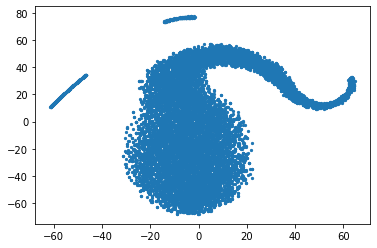

In [ ]:
x_axis= data_embed[:,0]
y_axis=data_embed[:,1]

plt.scatter(x_axis, y_axis, s=5)
plt.show() ## The plots vary each time you run them 

After dimension reduction, there is this obvious tail that extends from the main group. Thre must have been a group of words that were similar for there to be this shape since t-SNE keeps things close close together in the final visualization as well. Those words on the tail are probably very common words (he, the, is) that do not have clear correlations. This is not a very good representation because most likely, some of these words are only used once.

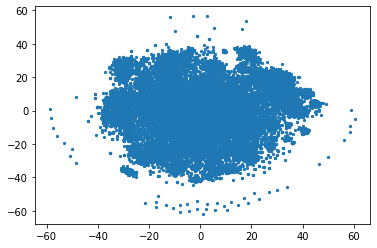

In [ ]:
x_axis= data_embed_a[:,0]
y_axis=data_embed_a[:,1]

plt.scatter(x_axis, y_axis, s=5)
plt.show() 

There is a big cloud of data but we can see small groups that form within it. This does make sense because we are sampling from a dataset that is billions large. The small clusters that we can see reprsent the groups of words that are similar.